In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Libraries for TensorFlow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers

# Library for Transfer Learning
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

print("Importing libraries completed.")

Importing libraries completed.


In [2]:
# Mount to drive
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/ML-Final-Project/") # Remember to add this shared folder as shortcut to your own google drive
os.getcwd()

Mounted at /content/drive


'/content/drive/.shortcut-targets-by-id/1CdXXOINmvPb172gUSrPGGw2VmjgV5Mmb/ML-Final-Project'

In [ ]:
#************Comment this part after data preparation********************
import os
import numpy as np
import shutil
# Creating Train / Test folders (One time use)
root_dir = "/content/drive/MyDrive/ML-Final-Project/whole-1000"
root_dir1 = "/content/drive/MyDrive/ML-Case"
'''
if(os.path.exists(root_dir +'/train/')):
  shutil.rmtree(root_dir +'/train/')
if(os.path.exists(root_dir +'/test/')):
  shutil.rmtree(root_dir +'/test/')
'''
classes = sorted(os.listdir(root_dir))
print(classes)
'''
for i in range(len(classes)):
  os.makedirs(root_dir1 +'/train/' + classes[i])
  os.makedirs(root_dir1 +'/test/' + classes[i])
'''
# Creating partitions of the data after shuffeling
for i in range(len(classes)):
  currentCls = classes[i]
  src = root_dir +'/' + currentCls # Folder to copy images from
  allFileNames = os.listdir(src)
  np.random.shuffle(allFileNames)
  train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)*0.7)])
  train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
  test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]
  #print('class: ', classes[i])
  #print('Total images: ', len(allFileNames))
  #print('Training: ', len(train_FileNames))
  #print('Testing: ', len(test_FileNames))
  
  # Copy-pasting images
  for name in train_FileNames:
    shutil.copy(name, root_dir1 + "/train/" + currentCls)
  for name in test_FileNames:
    shutil.copy(name, root_dir1 + "/test/" + currentCls)


['drawing', 'painting', 'photograph', 'photomechanical print']


In [3]:
# listing the folders containing images

# Main Dataset
main_folder="/content/drive/MyDrive/ML-Case/train"
class_names=os.listdir(main_folder)
print(class_names)
print("\n")

# Validation Dataset
val_class_names = []
validation_folder="/content/drive/MyDrive/ML-Case/test"
for i in range(len(os.listdir(validation_folder))):
  if(os.listdir(validation_folder)[i] != '.DS_Store'):
    val_class_names.append(os.listdir(validation_folder)[i])

print(val_class_names)

['drawing', 'painting', 'photograph', 'photomechanical print']


['drawing', 'painting', 'photograph', 'photomechanical print']


In [4]:
# Preparing Training image data (image array and class name) for processing

# Declaring variables
x=[] # to store array value of the images
y=[] # to store the labels of the images

for folder in os.listdir(main_folder):
    image_list=os.listdir(main_folder+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(main_folder+"/"+folder+"/"+img_name,target_size=(224,224))
        
        # Converting to arrary
        img=image.img_to_array(img)
        
        # Transfer Learning: this is to apply preprocess of VGG16 model to our images before passing it to VGG16
        img=preprocess_input(img) #  Optional step
        
        # Appending the arrarys
        x.append(img) # appending image array
        y.append(class_names.index(folder)) # appending class index to the array
    print("Complete:", folder)   
print("Preparing Training Dataset Completed.")

Complete: drawing
Complete: painting
Complete: photograph
Complete: photomechanical print
Preparing Training Dataset Completed.


In [5]:
# Preparing validation images data (image array and class name) for processing

# Declaring variables
val_images=[]
val_images_Original=[]
val_image_label=[] # to store the labels of the images

for folder in os.listdir(validation_folder):
  if(folder != '.DS_Store'):
    image_list=os.listdir(validation_folder+"/"+folder)
  #print(image_list)
    for img_name in image_list:
      if(folder != '.DS_Store'):
        # Loading images
        img=image.load_img(validation_folder+"/"+folder+"/"+img_name,target_size=(224,224))
        
        # Converting to arrarys
        img=image.img_to_array(img)
        
        # Saving original images, will be used just for display at the end
        val_images_Original.append(img.copy())
        
        # Transfer Learning: this is to apply preprocess of VGG16 to our images before passing it to VGG16
        img=preprocess_input(img) #  Optional step
        
        # Appending arrays
        val_images.append(img) # appending image array
        val_image_label.append(val_class_names.index(folder))
    print("Complete:", folder)    
print("Preparing Validation Dataset Completed.")

Complete: drawing
Complete: painting
Complete: photograph
Complete: photomechanical print
Preparing Validation Dataset Completed.


In [6]:
# Verifying the output

# Training Dataset
print("Training Dataset")

x=np.array(x) # Converting to np arrary to pass to the model
print(x.shape)

y=to_categorical(y) # onehot encoding of the labels
# print(y)
print(y.shape)


# Validation Dataset
print("Validation Dataset")

val_images=np.array(val_images) 
print(val_images.shape)

val_image_label=to_categorical(val_image_label) # onehot encoding of the labels)
print(val_image_label.shape)

Training Dataset
(2971, 224, 224, 3)
(2971, 4)
Validation Dataset
(1275, 224, 224, 3)
(1275, 4)


In [7]:
# Check properties of the model that we are going to use for Transfer Learning
print("Summary of default VGG16 model.\n")

# we are using VGG16 for transfer learnin here. 
from tensorflow.keras.applications import VGG16

# initializing model with weights='imagenet'i.e. we are carring its original weights
model_vgg16=VGG16(weights='imagenet')

# display the summary to see the properties of the model
model_vgg16.summary()

Summary of default VGG16 model.

553467096/553467096 [==============================] - 22s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                          

In [8]:
# Modelling WITH Transfer Learning

# Here we will prepare model as per our requirements
print("Summary of Custom VGG16 model.\n")
print("1) We setup input layer and 2) We removed top (last) layer. \n")

# let us prepare our input_layer to pass our image size. default is (224,224,3). we will change it to (224,224,3)
input_layer=layers.Input(shape=(224,224,3))

# initialize the transfer model VGG16 with appropriate properties per our need.
# we are passing paramers as following
# 1) weights='imagenet' - Using this we are carring weights as of original weights.
# 2) input_tensor to pass the VGG16 using input_tensor
# 3) we want to change the last layer so we are not including top layer
model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)

# See the summary of the model with our properties.
model_vgg16.summary()

Summary of Custom VGG16 model.

1) We setup input layer and 2) We removed top (last) layer. 

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None

In [9]:
# access the current last layer of the model and add flatten and dense after it
print("Summary of Custom VGG16 model.\n")
print("1) We flatten the last layer and added 1 Dense layer and 1 output layer.\n")

last_layer=model_vgg16.output # we are taking last layer of the model

# Add flatten layer: we are extending Neural Network by adding flattn layer
flatten=layers.Flatten()(last_layer) 

# Add dense layer
# dense1=layers.Dense(100,activation='relu')(flatten)

# Add dense layer to the final output layer
output_layer=layers.Dense(4,activation='softmax')(flatten)

# Creating modle with input and output layer
model=models.Model(inputs=input_layer,outputs=output_layer)

# Summarize the model
model.summary()

Summary of Custom VGG16 model.

1) We flatten the last layer and added 1 Dense layer and 1 output layer.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                     

In [10]:
# we will freez all the layers except the last layer

# we are making all the layers intrainable except the last layer
print("We are making all the layers intrainable except the last layer. \n")
for layer in model.layers[:-1]:
    layer.trainable=False
model.summary()

We are making all the layers intrainable except the last layer. 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                             

In [11]:
# Train the Model
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=5)
#print(xtrain.size)
#print(xtest.size)
#print(ytrain.size)
#print(ytest.size)

print("Splitting data for train and test completed.")

Splitting data for train and test completed.


#Case1: lr = 1, batch_size = 64, epoch = 10

In [30]:
# Compiling Model
from keras.optimizers import Adam
opt = Adam(learning_rate=1)
model.compile(loss='categorical_crossentropy', optimizer= opt ,metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print("Model compilation completed.")

Model compilation completed.


In [ ]:
# Fit the Model
import time
time1 = time.time() #timekeeping
hist = model.fit(xtrain,ytrain,epochs=10,batch_size=64,verbose=True,validation_data=(xtest,ytest))
time2 = time.time() #timekeeping
print('ETA of completion:',(time2 - time1)/60,'minutes')
print("Fitting the model completed.")

Epoch 1/10
38/38 [==============================] - 28s 446ms/step - loss: 3654.7849 - accuracy: 0.7929 - val_loss: 2786.1016 - val_accuracy: 0.8319
Epoch 2/10
38/38 [==============================] - 14s 367ms/step - loss: 624.4267 - accuracy: 0.9402 - val_loss: 1910.5244 - val_accuracy: 0.9109
Epoch 3/10
38/38 [==============================] - 14s 375ms/step - loss: 237.7542 - accuracy: 0.9705 - val_loss: 1568.6307 - val_accuracy: 0.8958
Epoch 4/10
38/38 [==============================] - 14s 378ms/step - loss: 88.1384 - accuracy: 0.9853 - val_loss: 1658.1042 - val_accuracy: 0.9025
Epoch 5/10
38/38 [==============================] - 15s 390ms/step - loss: 44.3224 - accuracy: 0.9916 - val_loss: 1383.9395 - val_accuracy: 0.9160
Epoch 6/10
38/38 [==============================] - 15s 402ms/step - loss: 37.1153 - accuracy: 0.9949 - val_loss: 1386.5697 - val_accuracy: 0.9076
Epoch 7/10
38/38 [==============================] - 15s 397ms/step - loss: 26.3767 - accuracy: 0.9962 - val_loss: 

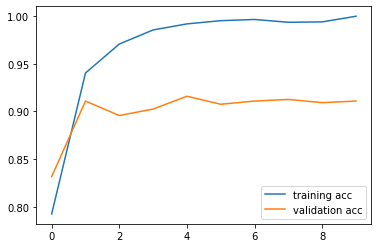

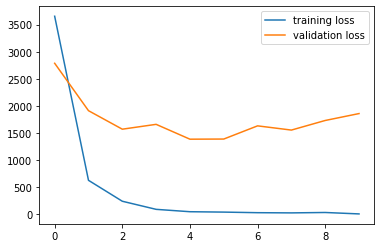

In [ ]:
# plot learning curve
def plot_learning_curve(history):
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, label='training acc')
    plt.plot(epochs, val_acc, label='validation acc')
    plt.legend();
    plt.figure();

    plt.plot(epochs, loss, label='training loss')
    plt.plot(epochs, val_loss, label='validation loss')
    plt.legend();

plot_learning_curve(hist)

In [ ]:
#Predict classification results
ypred_prob =model.predict(val_images)
ypred = np.argmax(ypred_prob,axis=1)

40/40 [==============================] - 11s 216ms/step


In [ ]:
#Final model evaluation
truelabels = []
predictions = []
for i in range(ypred.size):
  if(ypred[i] == 0):
    predictions.append('drawing')
  elif(ypred[i] == 1):
    predictions.append('painting')
  elif(ypred[i] == 2):
    predictions.append('photograph')
  else:
    predictions.append('photomechanical print')

for i in range(int(val_image_label.size/4)):
  if(val_image_label[i][0] == 1):
    truelabels.append('drawing')
  elif(val_image_label[i][1] == 1):
    truelabels.append('painting')
  elif(val_image_label[i][2] == 1):
    truelabels.append('photograph')
  elif(val_image_label[i][3] == 1):
    truelabels.append('photomechanical print')
  
#print(truelabels)

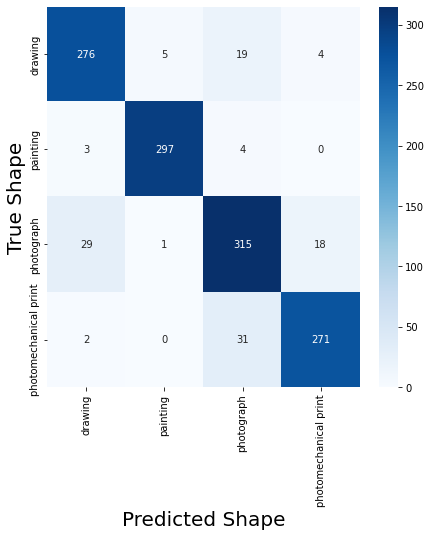

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns
# Plot the confusion matrix
cm = confusion_matrix(truelabels, predictions)
tick_marks = np.arange(len(class_names))

df_cm = pd.DataFrame(cm, index = class_names, columns = class_names)
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel("Predicted Shape", fontsize = 20)
plt.ylabel("True Shape", fontsize = 20)
plt.show()

# Result Evaluation and Discussion - Case 1

From above result, we could draw some conclusions:
 

1.   For learning rate = 1 and batch_size = 64, after running 10 epoch, the accuracy for training set is 99.96% and accuracy for validation set is over 91%.
2.   VGG-16 could handle this dataset well since the final classification result is well-calibrated.

# Parameters Tuning

#Case2: lr = 10, batch_size = 30, epoch = 10

In [ ]:
# Compiling Model
opt = Adam(lr=10)
model.compile(loss='categorical_crossentropy', optimizer= opt ,metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print("Model compilation completed.")

Model compilation completed.


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Fit the Model
import time
time1 = time.time() #timekeeping
hist1 = model.fit(xtrain,ytrain,epochs=10,batch_size=30,verbose=True,validation_data=(xtest,ytest))
time2 = time.time() #timekeeping
print('ETA of completion:',(time2 - time1)/60,'minutes')
print("Fitting the model completed.")

Epoch 1/10
80/80 [==============================] - 22s 236ms/step - loss: 18112.7891 - accuracy: 0.8754 - val_loss: 21323.3516 - val_accuracy: 0.8807
Epoch 2/10
80/80 [==============================] - 16s 197ms/step - loss: 12361.7959 - accuracy: 0.9301 - val_loss: 28636.5605 - val_accuracy: 0.8891
Epoch 3/10
80/80 [==============================] - 15s 193ms/step - loss: 5009.9766 - accuracy: 0.9630 - val_loss: 32987.8125 - val_accuracy: 0.8824
Epoch 4/10
80/80 [==============================] - 15s 188ms/step - loss: 2145.9749 - accuracy: 0.9798 - val_loss: 28599.2441 - val_accuracy: 0.8924
Epoch 5/10
80/80 [==============================] - 15s 187ms/step - loss: 1984.5743 - accuracy: 0.9827 - val_loss: 31199.6406 - val_accuracy: 0.9176
Epoch 6/10
80/80 [==============================] - 15s 189ms/step - loss: 882.8611 - accuracy: 0.9891 - val_loss: 37381.0820 - val_accuracy: 0.8908
Epoch 7/10
80/80 [==============================] - 15s 192ms/step - loss: 1112.1376 - accuracy: 0.

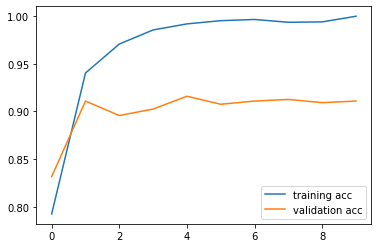

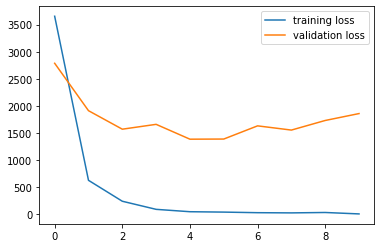

In [ ]:
plot_learning_curve(hist1)

In [ ]:
ypred_prob =model.predict(val_images)
ypred = np.argmax(ypred_prob,axis=1)

40/40 [==============================] - 6s 151ms/step


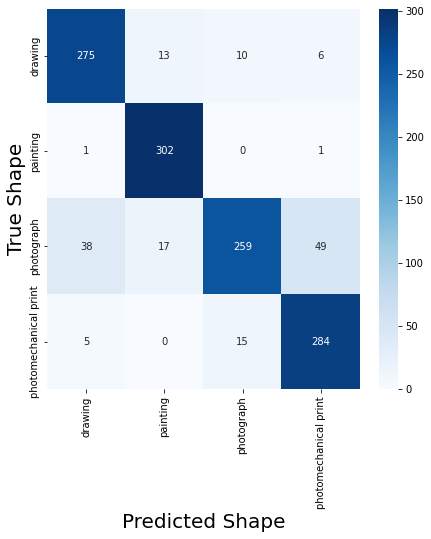

In [ ]:
#Final model evaluation
truelabels = []
predictions = []
for i in range(ypred.size):
  if(ypred[i] == 0):
    predictions.append('drawing')
  elif(ypred[i] == 1):
    predictions.append('painting')
  elif(ypred[i] == 2):
    predictions.append('photograph')
  else:
    predictions.append('photomechanical print')

for i in range(int(val_image_label.size/4)):
  if(val_image_label[i][0] == 1):
    truelabels.append('drawing')
  elif(val_image_label[i][1] == 1):
    truelabels.append('painting')
  elif(val_image_label[i][2] == 1):
    truelabels.append('photograph')
  elif(val_image_label[i][3] == 1):
    truelabels.append('photomechanical print')


# Plot the confusion matrix
cm = confusion_matrix(truelabels, predictions)
tick_marks = np.arange(len(class_names))

df_cm = pd.DataFrame(cm, index = class_names, columns = class_names)
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel("Predicted Shape", fontsize = 20)
plt.ylabel("True Shape", fontsize = 20)
plt.show()

# Result Evaluation and Discussion - Case 2

1.   This is a relative coarse case with a larger learing rate and smaller batch size. Moreover the result is consistent with the parameters setting. To be more specific, the accuracy for training set is 99.2% and accuracy for validation set is over 90%.
2.   Within this dataset, for the catalory of "photograph", its validation performance is poorer than the rest three catalories relatively. We could calculate that the validation accaracy is: 259/(259+49+17+38) = 71.35%. The reason is that background of "photograph" and "photomechanical print" are much similar, both of them are light yellow and the resolution for "photo" is not as high as "painting" and "drawing". So this relative low performance is due to intrinsic character and therefore it might be hard to dampen the effect and enhance the validition accuracy.  
3.   The latent solution for discussion above might be pre-processing the dataset as extracting principal component for each artpieces. More work will be explained as in "autoencoder" part.
